In [138]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdChemReactions

In [153]:
vinyl_smiles = "OC(F)=C(Cl)Br"
dp0 = Chem.MolFromSmiles(vinyl_smiles)
dp0

[09:43:13] SMILES Parse Error: syntax error while parsing: OC/(F)=C(Cl)Br
[09:43:13] SMILES Parse Error: Failed parsing SMILES 'OC/(F)=C(Cl)Br' for input: 'OC/(F)=C(Cl)Br'


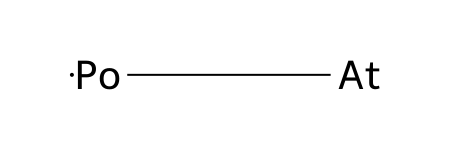

In [140]:
helper = Chem.MolFromSmiles("[Po]-[At]")
helper

### Initiation (vinyl)

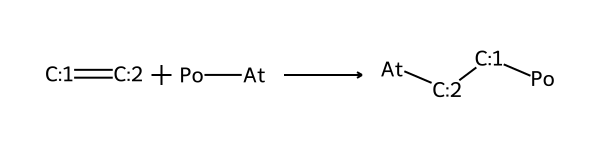

In [141]:
initiation = rdChemReactions.ReactionFromSmarts(
    "[C:1]=[C:2].[Po]-[At]>>[Po]-[C:1]-[C:2]-[At]"
)
initiation

[09:42:02] reactant 1 has no mapped atoms.


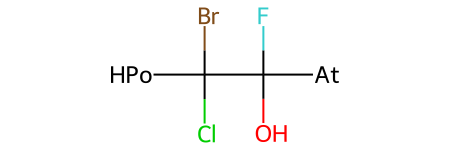

In [142]:
# first step (dp 0 to dp 1)
dp1 = initiation.RunReactants((dp0, helper))[1][0]
dp1

### Propagation reaction (should work for everything)

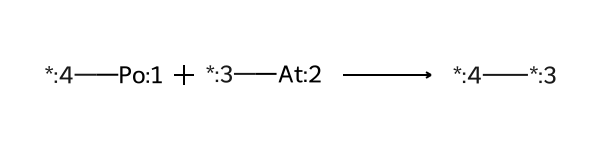

In [143]:
prop = rdChemReactions.ReactionFromSmarts(
    "[*:4]-[Po:1].[At:2]-[*:3]>>[*:4]-[*:3]"
)
prop

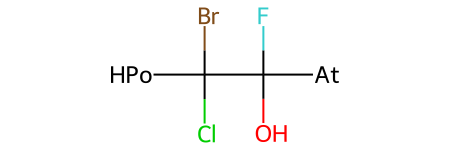

In [144]:
dp1

In [145]:
products = [item[0] for item in prop.RunReactants((dp1, dp1))]
products

[09:42:02] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 1 2 


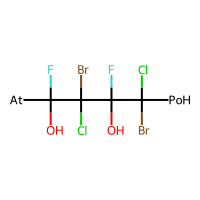

In [146]:
from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage(products, molsPerRow=1)

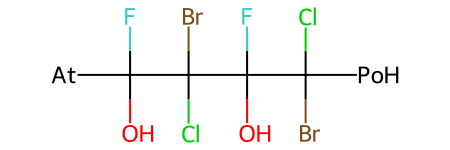

In [147]:
dp2 = products[0]
dp2

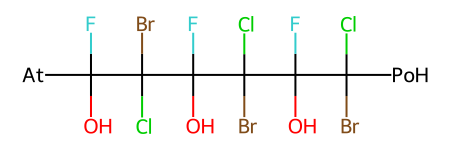

In [148]:
dp3 = prop.RunReactants((dp1, dp2))[0][0]
dp3

### Replace end groups with CH3s

In [149]:
replaceAt = rdChemReactions.ReactionFromSmarts(
    "[At:1]>>[C:1]"
)
replacePo = rdChemReactions.ReactionFromSmarts(
    "[Po:1]>>[C:1]"
)

In [150]:
replaceAt.RunReactantInPlace(dp3)

True

In [151]:
replacePo.RunReactantInPlace(dp3)

True

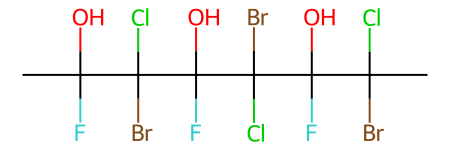

In [152]:
dp3